Sample of dataset:
   Variance  Skewness  Kurtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


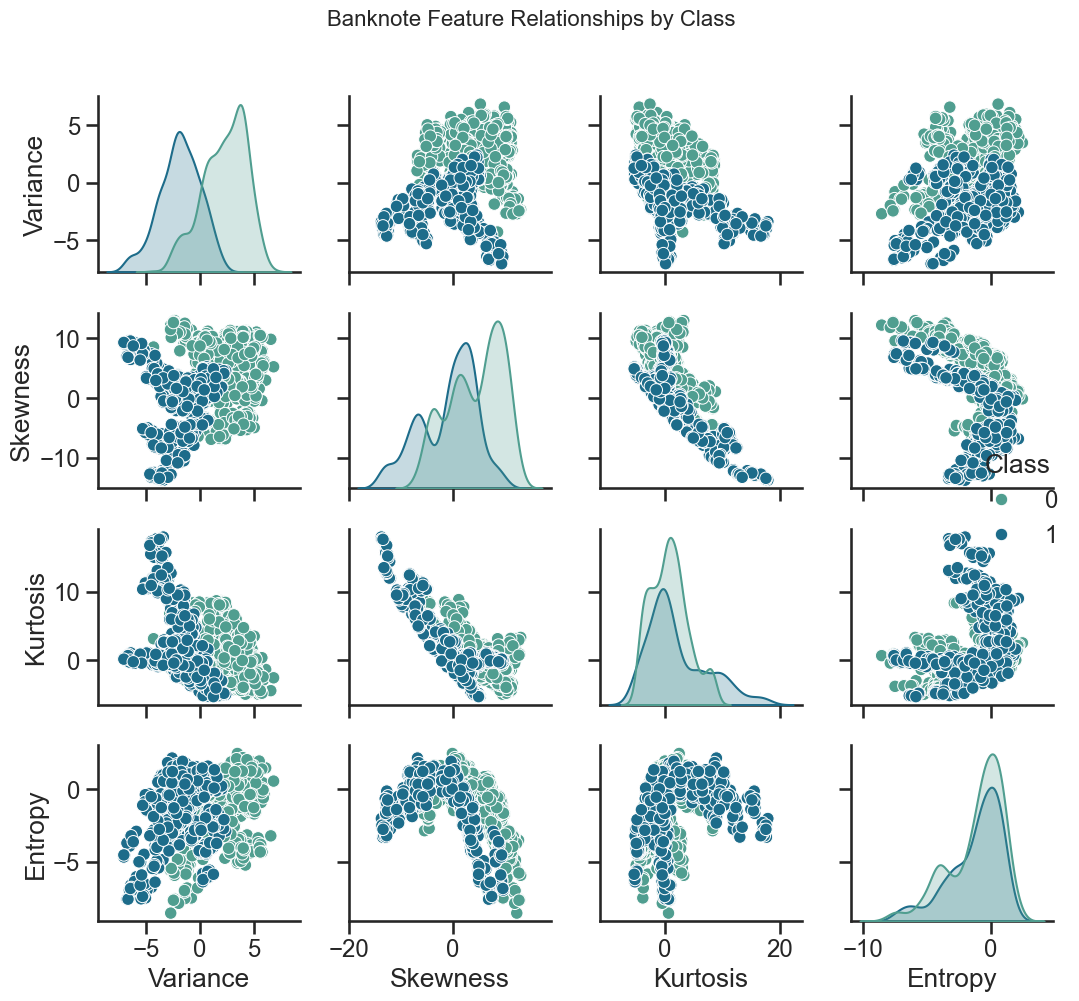

In [6]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a slightly customized visual style
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.05)
palette = sns.color_palette("crest", 2) 

# Load the Banknote Authentication dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']
df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
print("Sample of dataset:")
print(df.head())

# Visualize the pairwise relationships
sns.pairplot(df, hue='Class', palette=palette, diag_kind='kde')
plt.suptitle("Banknote Feature Relationships by Class", y=1.01, fontsize=16)
plt.tight_layout()
plt.show()


###  Part 2 – Output Interpretation

The pairplot generated from the dataset illustrates the relationships between all feature pairs, with each data point colored based on its class label (0: fake, 1: authentic). 

From the scatter plots, it is evident that certain feature combinations — particularly **Variance vs. Skewness** and **Skewness vs. Kurtosis** — show clear clustering behavior, allowing for visual distinction between the two classes. The **diagonal KDE plots** further confirm that the feature distributions differ significantly between class 0 and class 1.

These visual separations indicate that the dataset has structure that a decision tree model can exploit effectively. Since decision trees rely on axis-aligned splits, the class boundaries observed in the pairplot suggest that this method will likely perform well on this classification task.


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       148
           1       0.94      0.92      0.93       127

    accuracy                           0.93       275
   macro avg       0.93      0.93      0.93       275
weighted avg       0.93      0.93      0.93       275



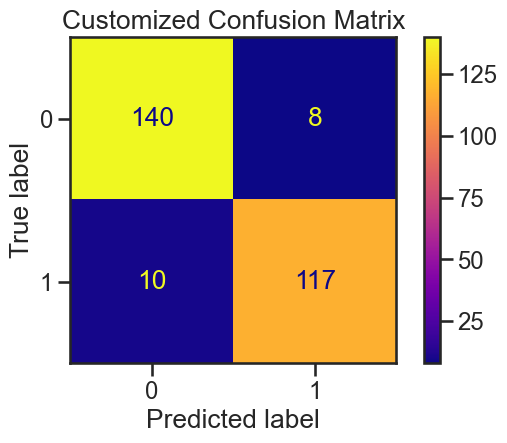

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and labels
X = df.drop("Class", axis=1)
y = df["Class"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train a decision tree classifier with custom parameters
clf = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=5,
    criterion="gini",
    random_state=42
)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

display = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, cmap="plasma", colorbar=True
)
plt.title("Customized Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()



###  Part 3 – Decision Tree Evaluation and Output Interpretation

After splitting the dataset with an 80/20 ratio, a Decision Tree classifier was trained using the Gini index as the criterion, a `max_depth` of 4, and `min_samples_split` of 5. The model performed well on the test set with the following key results:

- **Overall Accuracy**: **93%**
- **Fake Banknotes (Class 0)**:
  - Precision: 0.93
  - Recall: 0.95
  - F1-Score: 0.94
- **Authentic Banknotes (Class 1)**:
  - Precision: 0.94
  - Recall: 0.92
  - F1-Score: 0.93

The confusion matrix shows:
- ✅ 140 correctly predicted fake banknotes (True Negatives)
- ✅ 117 correctly predicted authentic banknotes (True Positives)
- ❌ 8 fake notes misclassified as authentic (False Positives)
- ❌ 10 authentic notes misclassified as fake (False Negatives)

The classification report and confusion matrix together indicate that the model achieves **balanced performance across both classes**. There’s no significant bias toward either class, and both precision and recall are consistently high.

This confirms that the Decision Tree is an effective model for this dataset, capable of capturing decision boundaries with a relatively shallow depth. Its strong interpretability and performance make it a good choice for this classification task.


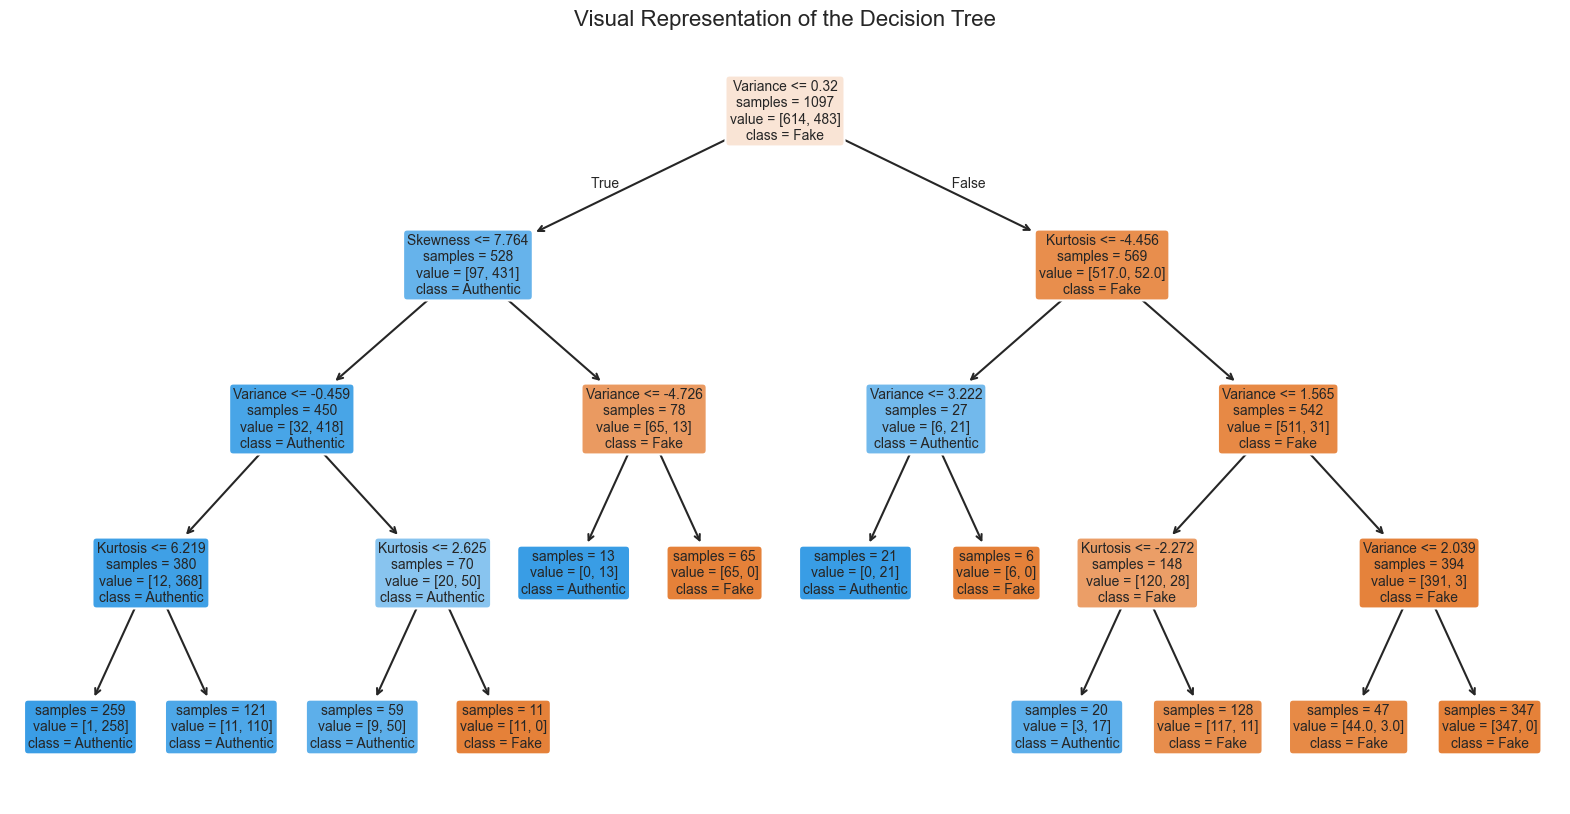

In [9]:
from sklearn.tree import plot_tree

# Plot the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Fake", "Authentic"],
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=10
)
plt.title("Visual Representation of the Decision Tree", fontsize=16)
plt.show()


###  Part 4 – Visualizing the Decision Tree

The decision tree trained with a maximum depth of 4 was visualized to better understand how the model makes decisions. The root node begins with a split on the `Variance` feature, which is a strong indicator of whether a banknote is fake or authentic. As the tree branches out, it continues splitting based on other features such as `Skewness`, `Kurtosis`, and `Entropy`.

From the plot, it is clear that:
- The **left branch** mainly identifies **authentic banknotes**, using thresholds on `Variance` and `Kurtosis`.
- The **right branch** largely classifies **fake banknotes**, leveraging both `Kurtosis` and `Variance` at various depths.
- Leaf nodes with pure class values (all samples belong to one class) show that the model confidently separates the data.

Each node in the tree displays the splitting condition, number of samples, class distribution (`value`), and the predicted class. Despite the model being relatively shallow (depth = 4), it captures the key decision boundaries with good generalization.

The tree is easy to interpret and visually confirms that the selected features provide strong separation between the two classes, making it a suitable model for this task.


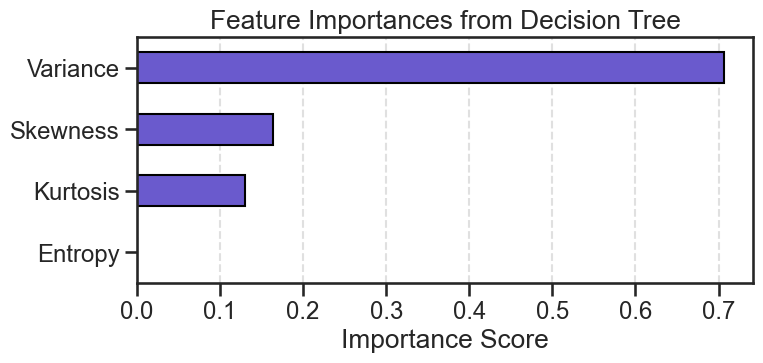

Feature Importances:
Variance    0.706487
Skewness    0.163444
Kurtosis    0.130069
Entropy     0.000000
dtype: float64


In [11]:
# Extract feature importances from the trained tree
importances = pd.Series(clf.feature_importances_, index=X.columns)

# Sort and plot
importances.sort_values().plot(kind='barh', figsize=(8, 4), color='slateblue', edgecolor='black')
plt.xlabel("Importance Score")
plt.title("Feature Importances from Decision Tree")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Optional: print exact values
print("Feature Importances:")
print(importances.sort_values(ascending=False))


###  Part 5 – Feature Importance Analysis

The trained decision tree model provides a breakdown of how much each feature contributed to the classification process. The importance scores are as follows:

- **Variance**: 0.706
- **Skewness**: 0.163
- **Kurtosis**: 0.130
- **Entropy**: 0.000

As seen in the horizontal bar chart, `Variance` stands out as the most dominant feature, contributing to over 70% of the tree’s decision-making process. This is consistent with its placement at the root node in the tree visualization.

Both `Skewness` and `Kurtosis` also play moderate roles in classification, particularly in the deeper branches of the tree. On the other hand, `Entropy` was not used at all in any of the splits, resulting in an importance score of zero.

This analysis confirms that the model relies heavily on a few strong features, particularly `Variance`, to differentiate between fake and authentic banknotes. Understanding this hierarchy of feature relevance can be useful for further feature selection or model simplification.
